In [1]:
%pylab inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def get_curve(ts):
    return np.cumprod(ts+1)
def plot(ts):
    plt.plot(get_curve(ts))

In [3]:
def get_portfolioTS(symbols, dir_):
    sers = pd.DataFrame()
    poss = pd.DataFrame()
    for symbol in symbols:
        path_ = '/'.join(('../data',dir_, symbol))
        data_ = pd.read_pickle(path_)
        ts_ = data_['stratret']
        pos_ = data_['pos']
        ts_ = ts_.dropna()
        sers[symbol] = ts_
        poss[symbol] = abs(pos_)
    return sers, poss

In [4]:
#variable: write the name of the directory here
dir_ = 'youngbuck'
leverage = 3

In [76]:
def get_wf_portfolio(dir_, step, lookback):
    symbols = os.listdir(dir_)
    start = 0
    end = step+lookback
    allsers = pd.Series()
    allposs = pd.Series()
    while True:
        print(1238-end)
        sers = pd.DataFrame()
        poss = pd.DataFrame()
        for symbol in symbols:
            ts = pd.read_pickle(''.join((dir_, symbol)))['2011 02':]['stratret']
            if len(ts) != 1238:
                continue
            ts = ts[start:end]
            pos = pd.read_pickle(''.join((dir_, symbol)))['2011 02':]['pos'][start:end]
            ts = ts.dropna()
            sers[symbol] = ts
            poss[symbol] = abs(pos)
        topn = list((sers[:lookback]+1).prod().sort_values(ascending=False)[:250].index)
        addser = sers[topn][lookback:].sum(axis = 1)
        addpos = poss[topn][lookback:].sum(axis = 1)
        allsers = pd.concat([allsers,addser])
        allposs = pd.concat([allposs, addpos])
        start +=step
        end+=step
        if end>1238:
            break
    return allsers, allposs

In [77]:
s,p = get_wf_portfolio('../data/youngbuck/', 60, 180)

998
938
878
818
758
698
638
578
518
458
398
338
278
218
158
98
38


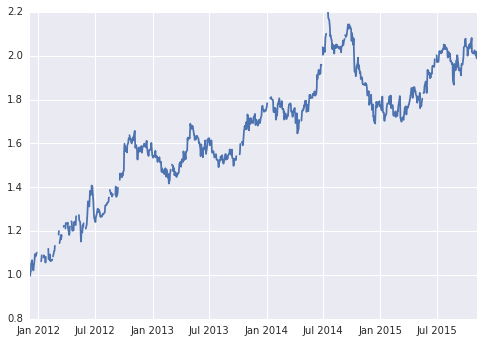

In [64]:
#90 210
plot(s/p)

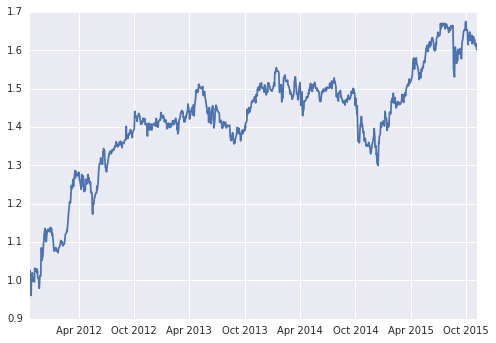

In [78]:
#60 180 #250
plot(s/p)

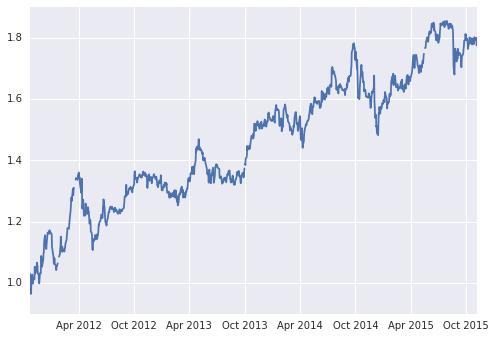

In [75]:
#60 180 #100
plot(s/p)

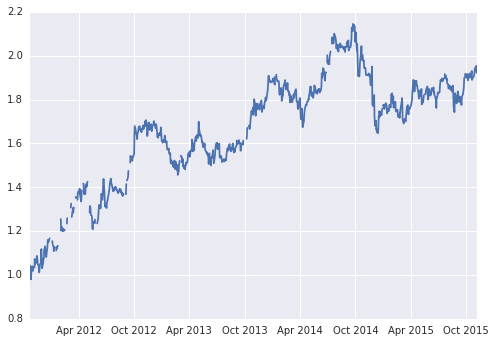

In [62]:
#60 180
plot(s/p)

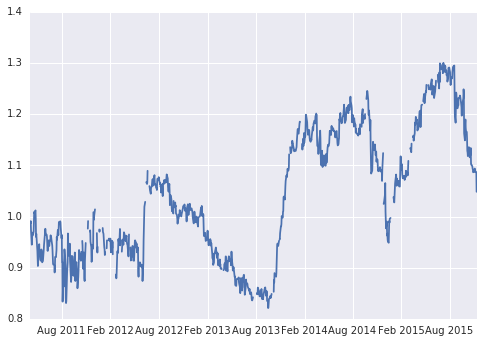

In [52]:
plot(s/p)

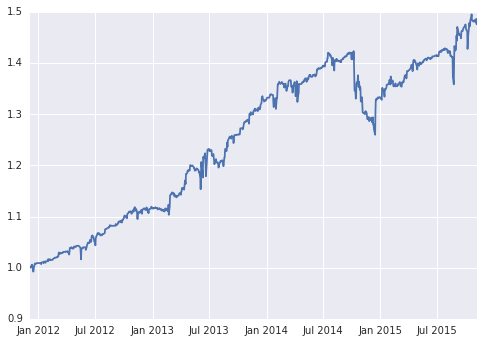

In [65]:
#90
plot(s*3/50)

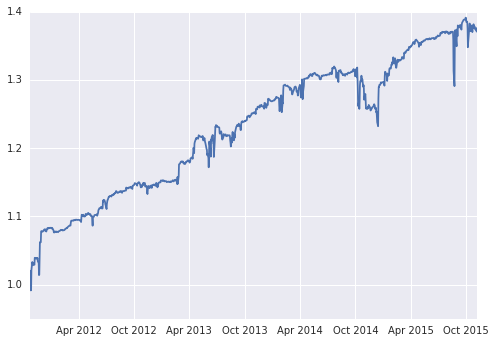

In [80]:
#60 250
plot(s*3/250)

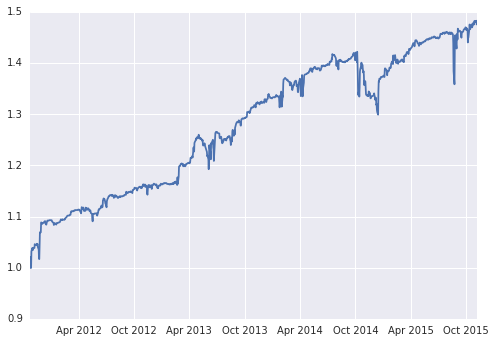

In [73]:
#60 100
plot(s*3/100)

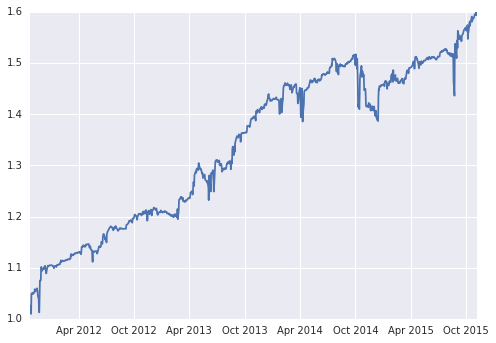

In [60]:
#60
plot(s*3/50)

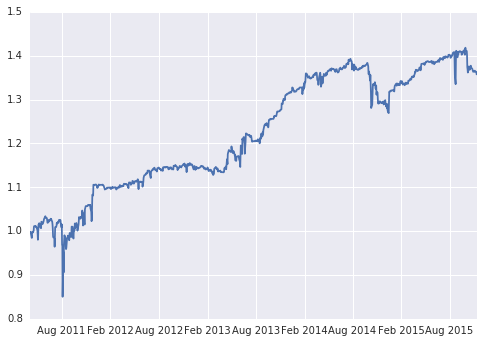

In [55]:
plot(s*3/50)

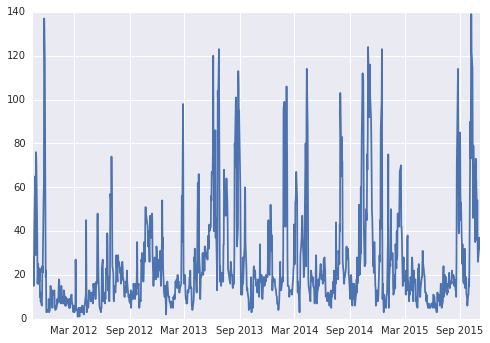

In [81]:
plt.plot(p)

# Goals
### Want plots for portfolios of:
* All symbols 2011-2015
* All symbols 2015
* Top N symbols 2011-2014
* The same top N over 2015
* Top N symbols in 2015 (as a control)

### Each portfolio with have return calculated in two ways:
* Constant allocation (sum of returns/#symbols)
* Full allocation (sum of returns/#positions)

453
['AA', 'AMP', 'MS', 'WHR', 'UHS', 'DHI', 'URI', 'GMCR', 'KSU', 'XEC', 'PRU', 'AMG', 'MHK', 'HON', 'PHM', 'HRB', 'A', 'CTXS', 'IVZ', 'SHW', 'UAL', 'KEY', 'TMK', 'PWR', 'HIG', 'HES', 'REGN', 'APC', 'PCLN', 'EQT', 'BRK-B', 'STT', 'LOW', 'TROW', 'COG', 'WYN', 'FLS', 'YUM', 'FOX', 'RF', 'ESV', 'LEN', 'RHI', 'FLR', 'FTR', 'PFG', 'MOS', 'DHR', 'HBI', 'LNC']


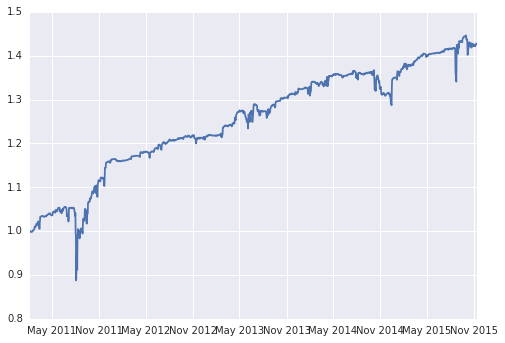

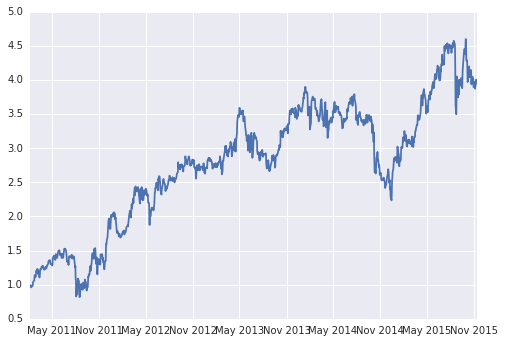

In [13]:
#All symbols 2011-2015
symbols = os.listdir(''.join(('../data/',dir_,'/')))
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
print(list((sers['2011':'2015']+1).prod().sort_values(ascending=False)[:50].index))
plot(sers['2011':'2015'].sum(axis = 1)*leverage/sers.shape[1])
show()
plot(sers['2011':'2015'].sum(axis = 1)*leverage/poss['2011':'2015'].sum(axis=1))
show()

453


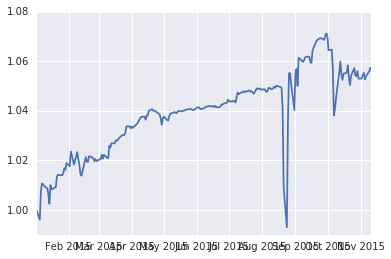

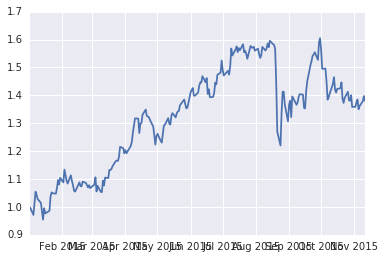

In [42]:
#All symbols 2015
symbols = os.listdir(''.join(('../data/',dir_,'/')))
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2015'].sum(axis = 1)*leverage/sers.shape[1])
show()
plot(sers['2015'].sum(axis = 1)*leverage/poss['2011':'2015'].sum(axis=1))
show()

50


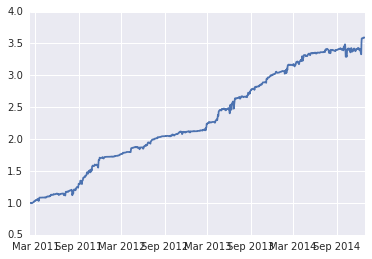

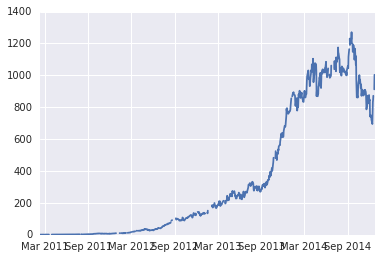

In [43]:
#Top N symbols 2011-2014
sss = pd.read_csv(''.join(('../data/performance_results/', dir_, '/test_individual.csv')), sep='\t', index_col=0)
symbols=sss.index
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2011':'2014'].sum(axis = 1)*leverage/sers.shape[1])
show()
plot(sers['2011':'2014'].sum(axis = 1)*leverage/poss['2011':'2015'].sum(axis=1))
show()

50


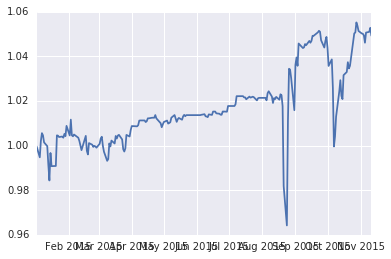

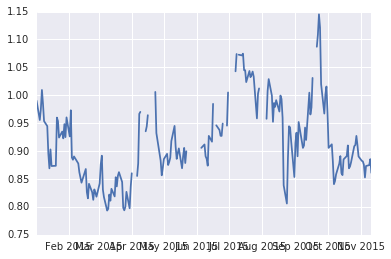

In [47]:
#sharpez
#The same top N over 2015
sss = pd.read_csv(''.join(('../data/performance_results/', dir_, '/test_individual.csv')), sep='\t', index_col=0)
symbols=sss.index
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2015'].sum(axis = 1)*leverage/sers.shape[1])
show()
plot(sers['2015'].sum(axis = 1)*leverage/poss['2015'].sum(axis=1))
show()

100


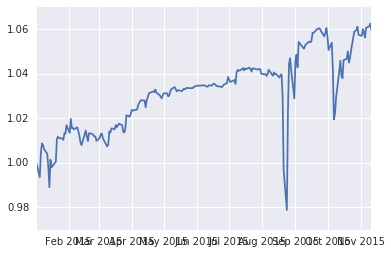

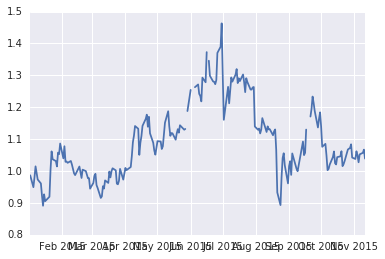

In [48]:
#sharpenz
#The same top N over 2015
sss = pd.read_csv(''.join(('../data/performance_results/', dir_, '/test_individual.csv')), sep='\t', index_col=0)
symbols=sss.index
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2015'].sum(axis = 1)*leverage/sers.shape[1])
show()
plot(sers['2015'].sum(axis = 1)*leverage/poss['2015'].sum(axis=1))
show()

100


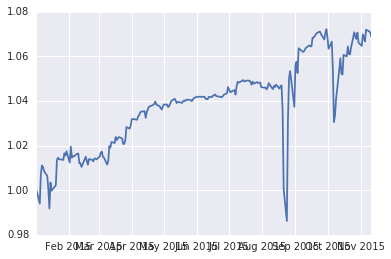

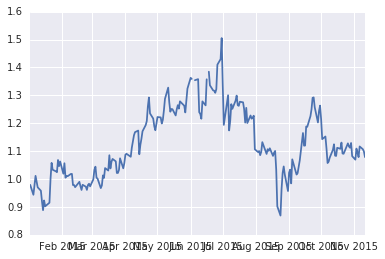

In [49]:
#rets
#The same top N over 2015
sss = pd.read_csv(''.join(('../data/performance_results/', dir_, '/test_individual.csv')), sep='\t', index_col=0)
symbols=sss.index
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2015'].sum(axis = 1)*leverage/sers.shape[1])
show()
plot(sers['2015'].sum(axis = 1)*leverage/poss['2015'].sum(axis=1))
show()

50


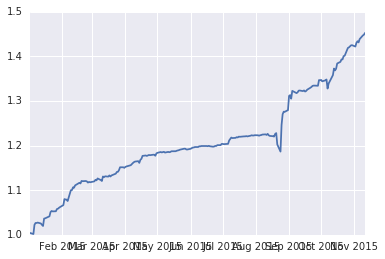

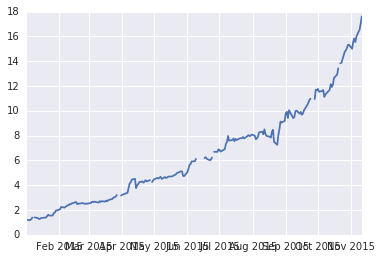

In [45]:
#Top N symbols in 2015 (as a control)
sss = pd.read_csv(''.join(('../data/performance_results/', dir_, '/control(top)_individual.csv')), sep='\t', index_col=0)
symbols=sss.index
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2015'].sum(axis = 1)*leverage/sers.shape[1])
show()
plot(sers['2015'].sum(axis = 1)*leverage/poss['2015'].sum(axis=1))
show()